In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("marketing_customer_analysis.csv")

In [32]:
data.sample(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
3939,GH94657,California,2319.818549,No,Basic,Bachelor,1/27/11,Disabled,M,14660,...,97,0,1,Personal Auto,Personal L2,Offer2,Call Center,397.0,Four-Door Car,Medsize
3196,FZ24763,California,5078.451231,No,Basic,Bachelor,1/4/11,Employed,M,35289,...,94,0,3,Personal Auto,Personal L1,Offer4,Web,124.0,Four-Door Car,Medsize
7759,GX38439,California,4470.181084,No,Extended,College,1/23/11,Unemployed,F,0,...,72,0,1,Personal Auto,Personal L2,Offer4,Web,929.0,SUV,Medsize
5957,WC72942,Oregon,3790.190029,No,Extended,High School or Below,2/8/11,Employed,M,66169,...,30,1,1,Personal Auto,Personal L2,Offer4,Web,156.0,Two-Door Car,Small
1309,LE26899,California,4825.500869,No,Basic,Doctor,2/15/11,Unemployed,M,0,...,27,0,9,Personal Auto,Personal L2,Offer3,Branch,273.0,Four-Door Car,Medsize
304,RR77985,Oregon,2887.742258,No,Extended,Bachelor,1/3/11,Unemployed,F,0,...,95,0,1,Personal Auto,Personal L1,Offer1,Call Center,677.0,Four-Door Car,Medsize
7861,KC67832,California,17292.935380,No,Extended,College,2/7/11,Employed,M,80028,...,37,0,2,Corporate Auto,Corporate L1,Offer2,Web,114.0,Four-Door Car,Medsize
5636,MZ85889,California,5421.524497,No,Basic,Master,2/26/11,Employed,F,25778,...,34,0,3,Corporate Auto,Corporate L2,Offer2,Call Center,20.0,Two-Door Car,Large
2752,LL57541,California,7712.436971,No,Extended,Master,1/14/11,Employed,F,63624,...,5,0,5,Personal Auto,Personal L3,Offer1,Call Center,175.0,Four-Door Car,Medsize
5545,BI33231,California,5120.615661,No,Extended,High School or Below,2/12/11,Unemployed,F,0,...,14,4,3,Personal Auto,Personal L3,Offer2,Agent,277.0,Four-Door Car,Medsize


In [4]:
#Show DataFrame info.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
#changing columns names

data_cols=data.columns

In [6]:
cols = [col_name.lower().replace(' ', '_') for col_name in data_cols]
cols

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

In [7]:
data.columns=cols 

In [8]:
data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
#ROUNDING total_claim_amount_column
data["total_claim_amount"]=data["total_claim_amount"].round()

Text(0.5, 1.0, 'Total number of responses')

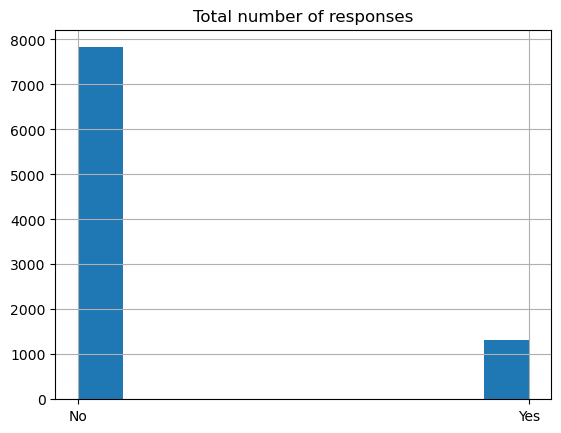

In [12]:
#Show a plot of the total number of responses.

data["response"].hist()
plt.title("Total number of responses")

Text(0.5, 1.0, 'Total Number of Responses')

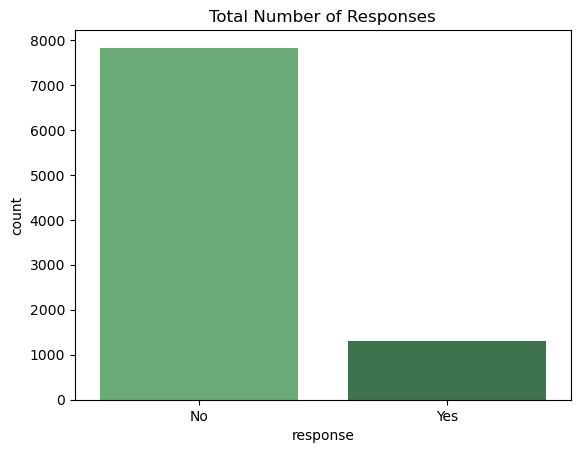

In [13]:
 #OR using seaborn
    
 sns.countplot(x="response",
 data=data,
 palette="Greens_d")
 plt.title("Total Number of Responses")

In [14]:
#1. Show a plot of the response rate by the sales channel.

# 1.1 Calculate RESPONSE RATE by SALES CHANNEL

new_df=data.groupby("sales_channel")["response"].value_counts(normalize=True)
new_df

sales_channel  response
Agent          No          0.808456
               Yes         0.191544
Branch         No          0.885469
               Yes         0.114531
Call Center    No          0.891218
               Yes         0.108782
Web            No          0.882264
               Yes         0.117736
Name: response, dtype: float64

In [15]:
# 1.2 Multiplying new_df by 100 since normalizing the value counts sets everything equal to 1 instead to 100.
# also resetting index will create a dataframe with 3 columns.

new_df=new_df.mul(100).rename("percent").reset_index()

In [16]:
new_df

,sales_channel,response,percent
0,Agent,No,80.845557
1,Agent,Yes,19.154443
2,Branch,No,88.546942
3,Branch,Yes,11.453058
4,Call Center,No,89.121813
5,Call Center,Yes,10.878187
6,Web,No,88.226415
7,Web,Yes,11.773585


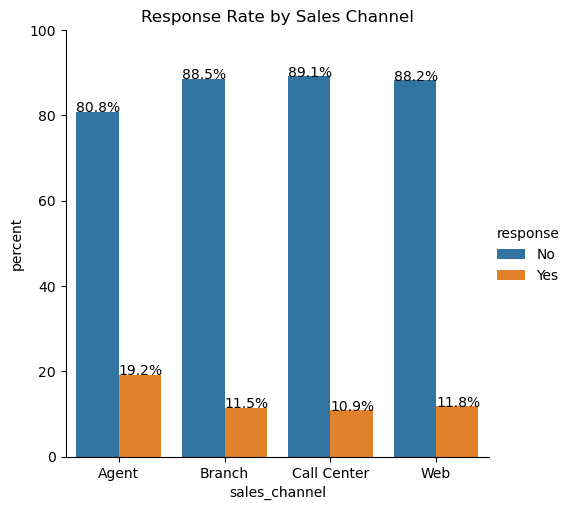

In [17]:
#1.3 Creating the plot

g = sns.catplot(x="sales_channel",y="percent", hue="response", kind="bar", data=new_df)
g.ax.set_ylim(0,100)   #sets the limit of y axis from 0-100
plt.title("Response Rate by Sales Channel")

#LOOP through each bar in the graph to add the percentage value
for p in g.ax.patches:
    txt=str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt)

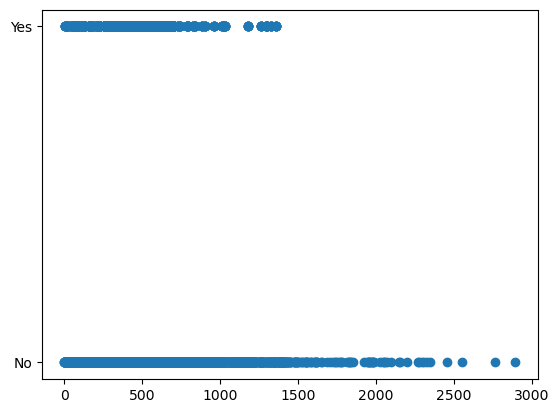

In [38]:
#Show a plot of the response rate by the total claim amount

plt.scatter(x=data['total_claim_amount'], y = data['response'])
plt.show()

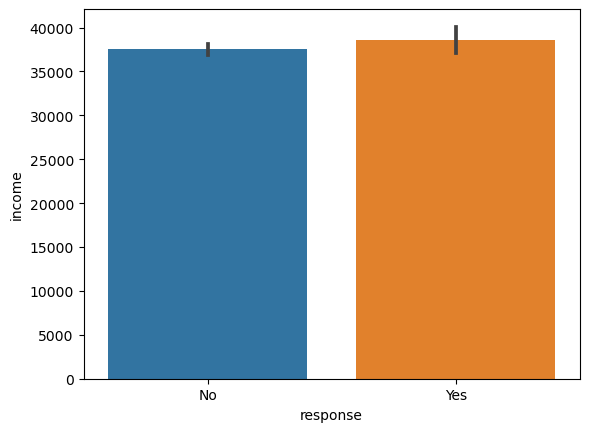

In [37]:
#Show a plot of the response rate by income.
g2=sns.barplot(x='response', y ="income", data = data)  
plt.show()